In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_colors(A, colors=[], labels=[], seed=0):
    rows, cols = np.where(A == 1)
    edges = zip(rows.tolist(), cols.tolist())

    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, seed=seed)  # positions for all nodes
    for color in set(colors):
        nx.draw_networkx_nodes(G,
                              pos,
                              nodelist=[i for i, c in enumerate(colors) if c==color],
                              node_color=color)
        nx.draw_networkx_nodes(G,
                              pos,
                              nodelist=[i for i, c in enumerate(colors) if c==color],
                              node_color=color)

    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    labels = {i: label for i, label in enumerate(labels)}
    nx.draw_networkx_labels(G, pos, labels, font_size=10, alpha=0.5)
    return plt

In [ ]:
import numpy as np

N1 = 20 # size of 1st cluster
N2 = 20 # size of 2nd cluster
N = N1 + N2
p = 0.05 # inter-cluster connection probablity

def get_random_sym_nonloop_adj(n, seed=0):
    np.random.seed(seed)
    A = np.random.randint(-100, 100 + 1, size=(n, n)) # adjacency matrix
    A = (A + A.T) / 2
    A = (A > 0) * 1
    for i in range(n):
        A[i, i] = 0
    return A


def get_sparse_matrix(p, size):
    """
    :param p: inter-cluster connection probablity
    """
    return np.random.binomial(
        1,
        [[p for i in range(size[1])] for j in range(size[0])],
        size=size)

In [ ]:
s = np.random.choice([-1, 1], size=(N,)) # specificity vector
colors = ['tab:red' if x == 1 else 'tab:blue' for x in s]
s

array([-1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
        1, -1, -1, -1, -1, -1])

In [ ]:
A0 = get_random_sym_nonloop_adj(N1, seed=1)
A1 = get_sparse_matrix(p, size=(N1, N2))
A2 = get_random_sym_nonloop_adj(N2, seed=2)

A = np.block([
    [A0, A1],
    [A1.T, A2]
    ])
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0]])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

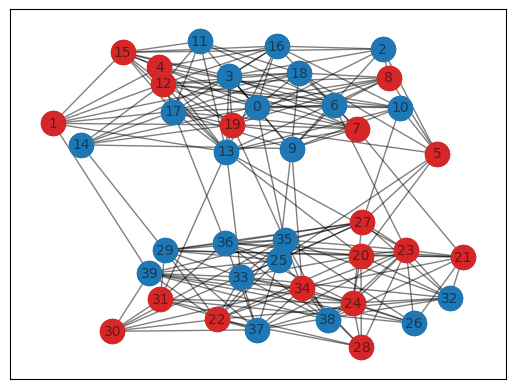

In [ ]:
show_graph_with_colors(A, colors=colors, labels=range(len(colors)))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

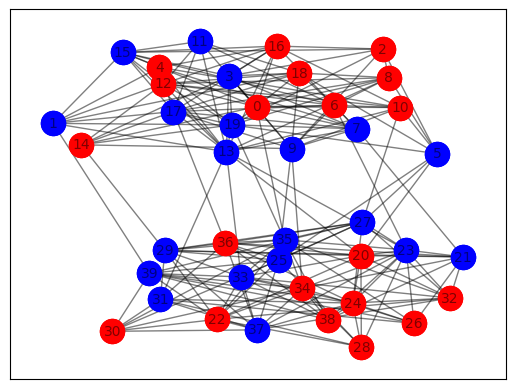

In [ ]:
show_graph_with_colors(A,
                       labels=range(len(s)),
                       colors=['r' if i % 2 == 0 else 'b' for i, label in enumerate(s)])

## Simple Clustring

The problem of simple clustering translated into below equation:
$$
\max_x x^T A x \\
s.t ~ x \in \{-1, 1\}^n; ~~ x^T1 = 0
$$

After a relaxation it would be rewritten as:
$$
\max_x Tr(AX) \\
s.t ~ x \in \{-1, 1\}^n ; ~~ ||X||_* = ||xx^T||_* \leq 1, ~ x^T1 = 0
$$

which is equal to:
$$
\max_x Tr((A - \mu 11^T)X) \\
s.t ~ x \in \{-1, 1\}^n ; ~~ ||X||_* = ||xx^T||_* \leq 1
$$

In [ ]:
from scipy import stats

def binary_clustring_acc(x, N1):
    """
    :param x: clustering vector
    :param N1: 1st cluster size
    """
    y_c1 = stats.mode(x[:N1])[0]
    y_c2 = - y_c1 # (-1, 1) <-> (1, -1)
    errors = np.sum(x[:N1] != y_c1) + np.sum(x[N1:] != y_c2)
    return 1 - errors / len(x)

### Solution 1: SVD
Since maximizing a convex function always has answer on the boundry here we would use SVD to find the best answer. So the problem could be re-written as:

$$
\max_x Tr((A - \mu 11^T)X) \\
s.t ~ x \in \{-1, 1\}^n ; ~~ ||X||_* = 1
$$

- Find top eigen verctor and apply elemntwise sum to get x vector.

In [ ]:
mu = 1
ONE_ONET = np.ones((N, N))

U, S, Vh = np.linalg.svd(A - mu * ONE_ONET)
S

array([2.99174234e+01, 9.02993452e+00, 4.66086939e+00, 4.28640087e+00,
       4.09415287e+00, 3.89827161e+00, 3.60248263e+00, 3.51026942e+00,
       3.48470299e+00, 3.11848656e+00, 3.08163464e+00, 3.00627370e+00,
       2.84581623e+00, 2.74286660e+00, 2.63681390e+00, 2.63138676e+00,
       2.51722799e+00, 2.18254677e+00, 2.11714414e+00, 2.10490733e+00,
       1.97417991e+00, 1.81194448e+00, 1.72874551e+00, 1.65336709e+00,
       1.57993977e+00, 1.46897283e+00, 1.35087837e+00, 1.11096830e+00,
       1.07548593e+00, 1.01578399e+00, 8.97552279e-01, 7.94086709e-01,
       6.96061897e-01, 6.42857983e-01, 5.91525424e-01, 4.83116023e-01,
       4.45878721e-01, 3.45321363e-01, 3.14060632e-01, 1.32290207e-02])

In [ ]:
U.T[0]

array([-0.14815173, -0.17125366, -0.17398566, -0.15891979, -0.16539664,
       -0.1684493 , -0.15392668, -0.16039697, -0.16563317, -0.15196478,
       -0.16498524, -0.17659609, -0.1418246 , -0.12677306, -0.17623163,
       -0.15352447, -0.1596244 , -0.13669474, -0.15819507, -0.14288511,
       -0.15397818, -0.16320259, -0.1532404 , -0.14314703, -0.14654967,
       -0.15281316, -0.17522862, -0.15415905, -0.1751735 , -0.15336639,
       -0.17500134, -0.16867154, -0.16547529, -0.14994852, -0.14706389,
       -0.13773836, -0.15424743, -0.15364555, -0.17069867, -0.15744159])

In [ ]:
U.T[1]

array([-0.18347596, -0.12822719, -0.11439162, -0.17191968, -0.17249177,
       -0.03248591, -0.16628856, -0.15608519, -0.15777867, -0.11152286,
       -0.11963603, -0.13615665, -0.22713372, -0.16040343, -0.10029059,
       -0.20400643, -0.18855756, -0.20686205, -0.16701204, -0.18042124,
        0.14157983,  0.11876056,  0.19433997,  0.15435133,  0.19913202,
        0.14225989,  0.11957681,  0.14831077,  0.12446109,  0.16197454,
        0.12632594,  0.10287413,  0.16874003,  0.18829495,  0.17559488,
        0.16861027,  0.14754793,  0.19658826,  0.14537641,  0.14670405])

In [ ]:
def cluster_using_SVD(M):
    """
    :param M: in-trace matrix
    """
    U, S, Vh = np.linalg.svd(M)
    # Change it to [1]
    return (U.T[1] > 0) * 2 - 1

def defualt_clustring_SVD(A, mu=1):
    """
    :param A: Adjacency matrix
    """
    return cluster_using_SVD(A - mu * ONE_ONET) # + CHANGED TO -

Accuracy:  1.0


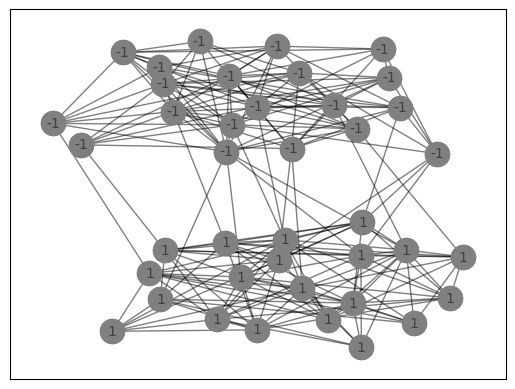

In [ ]:
x = defualt_clustring_SVD(A, mu=1)
show_graph_with_colors(A, labels=x, colors=['gray' for _ in x])
print("Accuracy: ", binary_clustring_acc(x, N1))

### Solution 2: EVD
Basd on [stackexchange](https://math.stackexchange.com/questions/683959/singular-values-of-matrix-as-optimization-problem).

First eigen-vector should be removed. Select the second one.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(A - mu * ONE_ONET) # + CHANGED TO -
eigenvalues

array([-2.99174234e+01,  9.02993452e+00, -4.66086939e+00,  3.60248263e+00,
       -4.28640087e+00, -4.09415287e+00, -3.89827161e+00,  3.11848656e+00,
        3.00627370e+00,  2.74286660e+00,  2.63138676e+00, -3.51026942e+00,
       -3.48470299e+00,  2.18254677e+00,  2.10490733e+00,  1.97417991e+00,
        1.81194448e+00, -3.08163464e+00, -2.84581623e+00, -2.63681390e+00,
       -2.51722799e+00,  1.46897283e+00, -2.11714414e+00,  1.07548593e+00,
        8.97552279e-01,  6.96061897e-01,  5.91525424e-01,  4.83116023e-01,
        3.14060632e-01, -1.72874551e+00, -1.65336709e+00, -1.57993977e+00,
       -1.35087837e+00, -1.32290207e-02, -1.11096830e+00, -1.01578399e+00,
       -3.45321363e-01, -4.45878721e-01, -6.42857983e-01, -7.94086709e-01])

In [ ]:
eigenvectors.T[1]

array([ 0.18347596,  0.12822719,  0.11439162,  0.17191968,  0.17249177,
        0.03248591,  0.16628856,  0.15608519,  0.15777867,  0.11152286,
        0.11963603,  0.13615665,  0.22713372,  0.16040343,  0.10029059,
        0.20400643,  0.18855756,  0.20686205,  0.16701204,  0.18042124,
       -0.14157983, -0.11876056, -0.19433997, -0.15435133, -0.19913202,
       -0.14225989, -0.11957681, -0.14831077, -0.12446109, -0.16197454,
       -0.12632594, -0.10287413, -0.16874003, -0.18829495, -0.17559488,
       -0.16861027, -0.14754793, -0.19658826, -0.14537641, -0.14670405])

In [ ]:
def cluster_using_EVD(M):
    """
    :param M: in-trace matrix
    """
    eigenvalues, eigenvectors = np.linalg.eig(M)
    # Change to 1
    return (eigenvectors.T[1] > 0) * 2 - 1

def defualt_clustring_EVD(A, mu=1):
    """
    :param A: Adjacency matrix
    """
    return cluster_using_EVD(A - mu * ONE_ONET) # + CHANGED TO -

Accuracy:  1.0


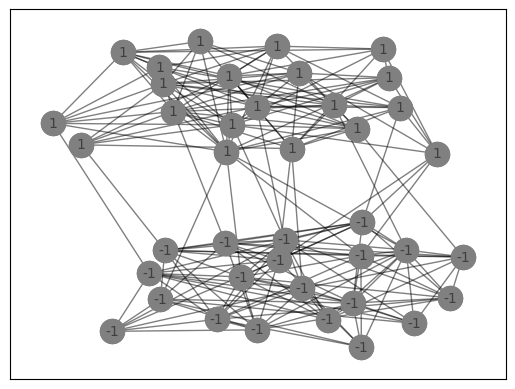

In [ ]:
x = defualt_clustring_EVD(A, mu=1)
show_graph_with_colors(A, labels=x, colors=['gray' for _ in x])
print("Accuracy: ", binary_clustring_acc(x, N1))

## Fair Clustring (1st approach)

The problem of simple clustering translated into below equation:
$$
\max_x x^T A x \\
s.t ~ x \in \{-1, 1\}^n; ~~ x^T1 = 0,~x^Ts = 0
$$

which is equal to:
$$
\max_x x^T (A - \lambda s s^T) x\\
s.t ~ x \in \{-1, 1\}^n; ~~ x^T1 = 0
$$

which is also equal to:
$$
\max_x x^T (A - \lambda s s^T - \mu 1 1^T) x\\
s.t ~ x \in \{-1, 1\}^n
$$

Which is simply solvable by substituting $A$ to $A - λ s s^T$ from the simple clustring model.

### Solution 1: SVD

In [ ]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0]])

In [ ]:
s.reshape((40, 1)) @ s.reshape((40, 1)).T

array([[ 1, -1,  1, ...,  1,  1,  1],
       [-1,  1, -1, ..., -1, -1, -1],
       [ 1, -1,  1, ...,  1,  1,  1],
       ...,
       [ 1, -1,  1, ...,  1,  1,  1],
       [ 1, -1,  1, ...,  1,  1,  1],
       [ 1, -1,  1, ...,  1,  1,  1]])

In [ ]:
def fair_clustering_SVD(A, s, mu=1, lambda_=1):
    return defualt_clustring_SVD(A - lambda_ * s.reshape((N, 1)) @ s.reshape((N, 1)).T, mu=mu)

Accuracy:  1.0


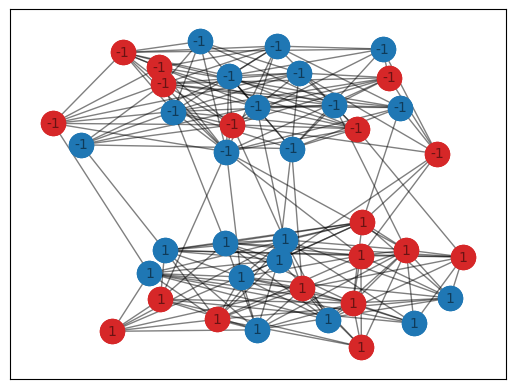

In [ ]:
# based on temporal
x = fair_clustering_SVD(A, s, mu=1, lambda_=0)
show_graph_with_colors(A, labels=x, colors=colors)
print("Accuracy: ", binary_clustring_acc(x, N1))

Accuracy:  0.55


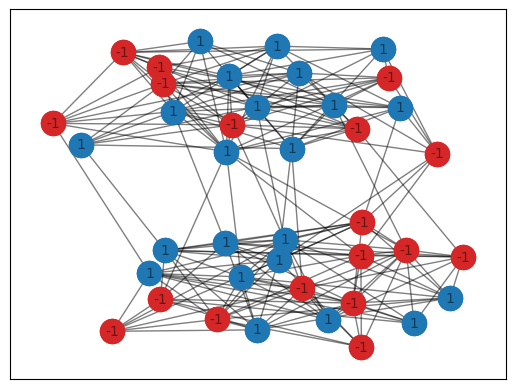

In [ ]:
# based on specifity
x = fair_clustering_SVD(A, s, mu=1, lambda_=0.5)
show_graph_with_colors(A, labels=x, colors=colors)
print("Accuracy: ", binary_clustring_acc(x, N1))

Accuracy:  0.75


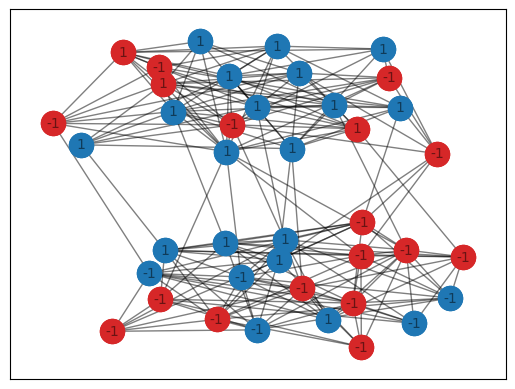

In [ ]:
# considering both
x = fair_clustering_SVD(A, s, mu=1, lambda_=-0.225)
show_graph_with_colors(A, labels=x, colors=colors)
print("Accuracy: ", binary_clustring_acc(x, N1))

### Solution 2: EVD

In [ ]:
def fair_clustering_EVD(A, s, mu=1, lambda_=1):
    return defualt_clustring_EVD(A - lambda_ * s.reshape((N, 1)) @ s.reshape((N, 1)).T, mu=mu)

Accuracy:  1.0


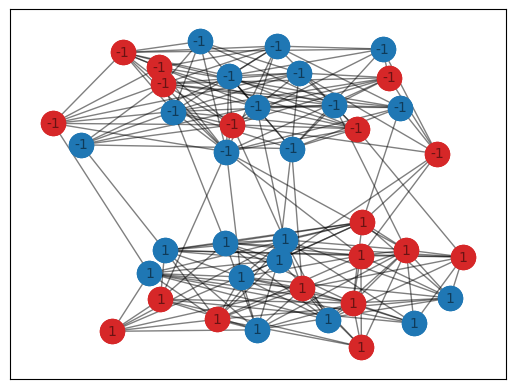

In [ ]:
x = fair_clustering_EVD(A, s, mu=1, lambda_=0.25)
show_graph_with_colors(A, labels=x, colors=colors)
print("Accuracy: ", binary_clustring_acc(x, N1))

## Analysis


### SVD

In [ ]:
s

array([-1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
        1, -1, -1, -1, -1, -1])

In [ ]:
x

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [ ]:
def my_specifiety_metric(s, x):
    return max(sum(s == x), sum(s == -x)) / x.size
my_specifiety_metric(s, x)

0.55

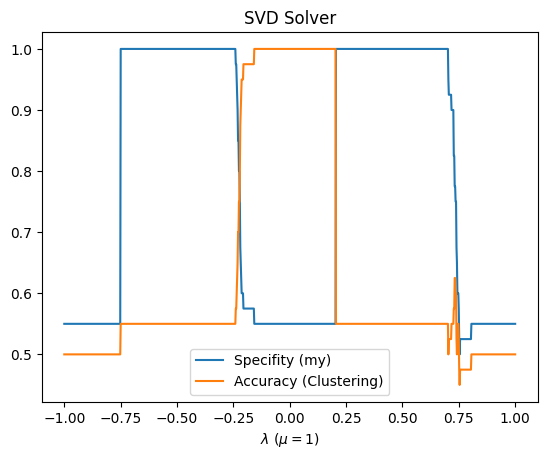

In [ ]:
LAMBDASs = np.linspace(-1, 1, 1000)
SPECs = []
ACCs = []
for LAMBDA in LAMBDASs:
    x = fair_clustering_SVD(A, s, mu=1, lambda_=LAMBDA)
    SPECs.append(my_specifiety_metric(x, s))
    ACCs.append(binary_clustring_acc(x, N1))

plt.plot(LAMBDASs, SPECs)
plt.plot(LAMBDASs, ACCs)
plt.title('SVD Solver')
plt.xlabel("$\lambda$ ($\mu=1$)")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])

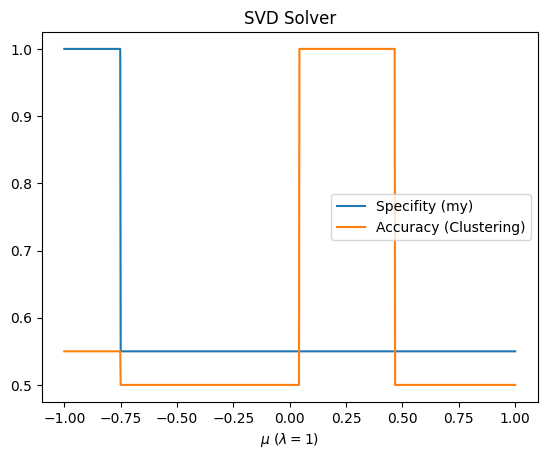

In [ ]:
MUs = np.linspace(-1, 1, 1000)
SPECs = []
ACCs = []
for MU in MUs:
    x = fair_clustering_SVD(A, s, mu=MU, lambda_=1)
    SPECs.append(my_specifiety_metric(x, s))
    ACCs.append(binary_clustring_acc(x, N1))

plt.plot(MUs, SPECs)
plt.plot(MUs, ACCs)
plt.title('SVD Solver')
plt.xlabel("$\mu$ ($\lambda=1$)")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])

10000it [00:27, 363.86it/s]


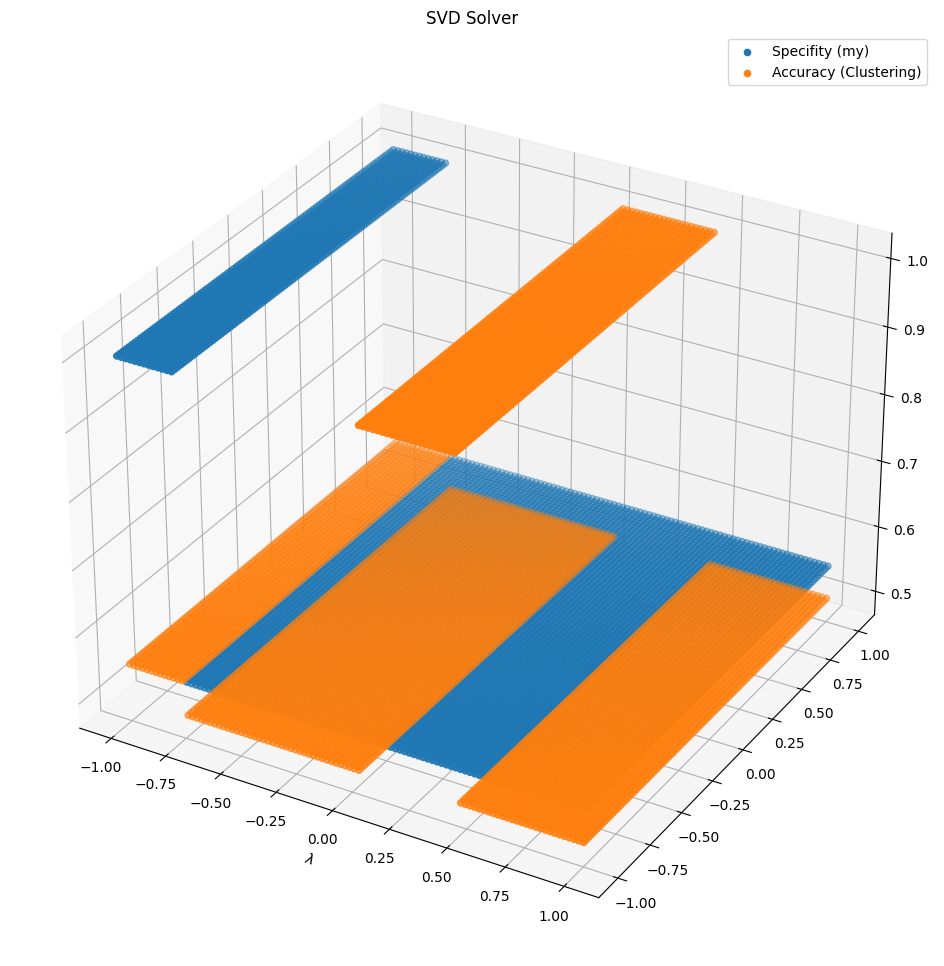

In [ ]:
from itertools import product
from tqdm import tqdm

MUs = np.linspace(-1, 1, 100)
LAMBDAs = np.linspace(-1, 1, 100)
X = []
Y = []
Z1 = []
Z2 = []

for MU, LAMBDA in tqdm(product(MUs, LAMBDAs)):
    x = fair_clustering_SVD(A, s, mu=MU, lambda_=1)
    X.append(MU)
    Y.append(LAMBDA)
    Z1.append(my_specifiety_metric(x, s))
    Z2.append(binary_clustring_acc(x, N1))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, Z1)
ax.scatter(X, Y, Z2)
plt.title('SVD Solver')
plt.xlabel("$\mu$")
plt.xlabel("$\lambda$")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])

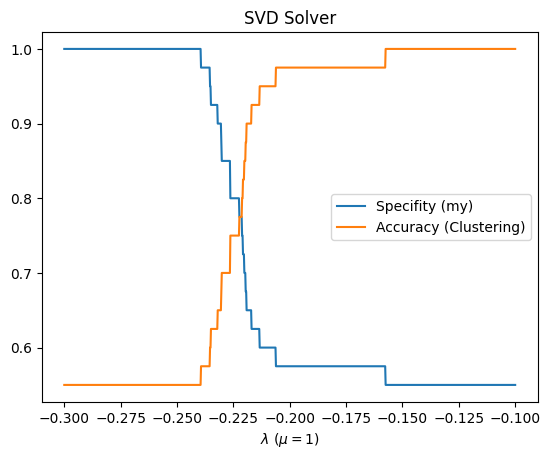

In [ ]:
LAMBDASs = np.linspace(-0.3, -0.1, 1000)
SPECs = []
ACCs = []
for LAMBDA in LAMBDASs:
    x = fair_clustering_SVD(A, s, mu=1, lambda_=LAMBDA)
    SPECs.append(my_specifiety_metric(x, s))
    ACCs.append(binary_clustring_acc(x, N1))

plt.plot(LAMBDASs, SPECs)
plt.plot(LAMBDASs, ACCs)
plt.title('SVD Solver')
plt.xlabel("$\lambda$ ($\mu=1$)")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])

### EVD

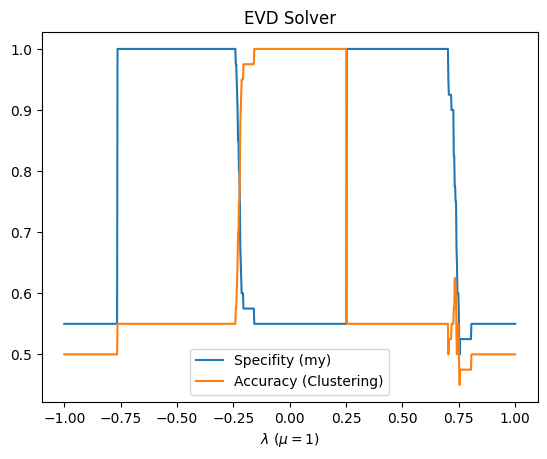

In [ ]:
LAMBDASs = np.linspace(-1, 1, 1000)
SPECs = []
ACCs = []
for LAMBDA in LAMBDASs:
    x = fair_clustering_EVD(A, s, mu=1, lambda_=LAMBDA)
    SPECs.append(my_specifiety_metric(x, s))
    ACCs.append(binary_clustring_acc(x, N1))

plt.plot(LAMBDASs, SPECs)
plt.plot(LAMBDASs, ACCs)
plt.title('EVD Solver')
plt.xlabel("$\lambda$ ($\mu=1$)")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])

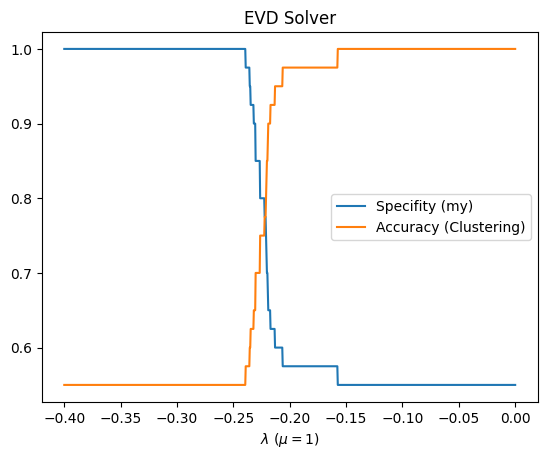

In [ ]:
LAMBDASs = np.linspace(-0.4, 0, 1000)
SPECs = []
ACCs = []
for LAMBDA in LAMBDASs:
    x = fair_clustering_EVD(A, s, mu=1, lambda_=LAMBDA)
    SPECs.append(my_specifiety_metric(x, s))
    ACCs.append(binary_clustring_acc(x, N1))

plt.plot(LAMBDASs, SPECs)
plt.plot(LAMBDASs, ACCs)
plt.title('EVD Solver')
plt.xlabel("$\lambda$ ($\mu=1$)")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])

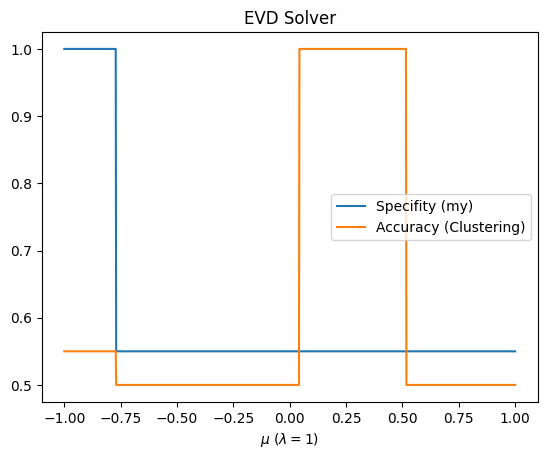

In [ ]:
MUs = np.linspace(-1, 1, 1000)
SPECs = []
ACCs = []
for MU in MUs:
    x = fair_clustering_EVD(A, s, mu=MU, lambda_=1)
    SPECs.append(my_specifiety_metric(x, s))
    ACCs.append(binary_clustring_acc(x, N1))

plt.plot(MUs, SPECs)
plt.plot(MUs, ACCs)
plt.title('EVD Solver')
plt.xlabel("$\mu$ ($\lambda=1$)")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])

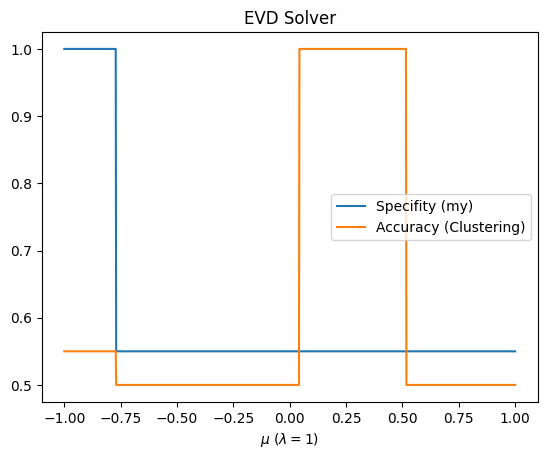

In [ ]:
MUs = np.linspace(-1, 1, 1000)
SPECs = []
ACCs = []
for MU in MUs:
    x = fair_clustering_EVD(A, s, mu=MU, lambda_=1)
    SPECs.append(my_specifiety_metric(x, s))
    ACCs.append(binary_clustring_acc(x, N1))

plt.plot(MUs, SPECs)
plt.plot(MUs, ACCs)
plt.title('EVD Solver')
plt.xlabel("$\mu$ ($\lambda=1$)")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])

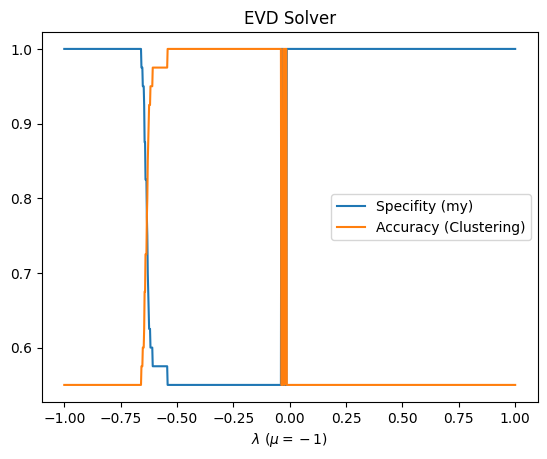

In [ ]:
LAMBDAs = np.linspace(-0.5, 1, 1000)
SPECs = []
ACCs = []
for LAMBDA in LAMBDAs:
    x = fair_clustering_EVD(A, s, mu=-1, lambda_=LAMBDA)
    SPECs.append(my_specifiety_metric(x, s))
    ACCs.append(binary_clustring_acc(x, N1))

plt.plot(MUs, SPECs)
plt.plot(MUs, ACCs)
plt.title('EVD Solver')
plt.xlabel("$\lambda$ ($\mu=-1$)")
plt.legend(["Specifity (my)", "Accuracy (Clustering)"])